In [1]:
import quantumpropagator as qp
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import sys
import glob
import pandas as pd
import numpy as np

%matplotlib inline

plt.rcParams.update({'font.size': 6})

### Getting data from Francoise folder

In [2]:
root = '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019'
manu_root = '/home/alessio/u-3dPropagation_manuscript/Report/images'
# 'steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total', 'Total Deviation', 
# 'Xpulse', 'Ypulse', 'Zpulse', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'Time AU', 
# 'Non-decided', 'Reactants', 'Products', 
# 'P(t) Tot', 'P(t) S0', 'P(t) S1', 'P(t) S2', 'P(t) S3', 'P(t) S4', 'P(t) S5', 'P(t) S6', 'P(t) S7'

### Positions

In [3]:
pos_folder = os.path.join(root, 'positions')
all_files_abs = [ os.path.join(pos_folder, x) for x in os.listdir(pos_folder)]
all_dfs = [pd.read_csv(x, index_col=0) for x in all_files_abs]

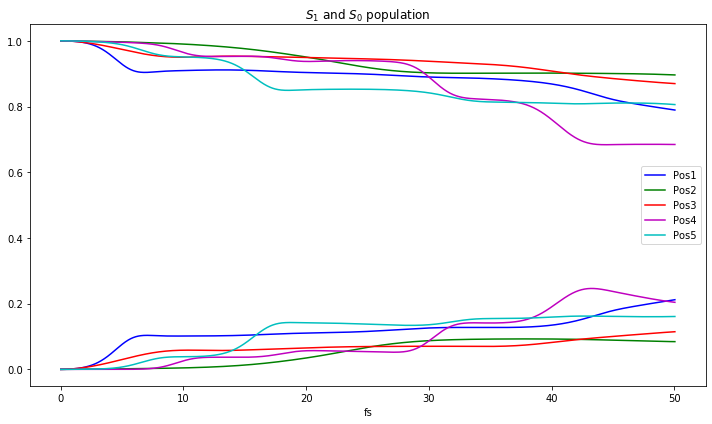

In [13]:
positionpopulation_out = os.path.join(manu_root,'positionpopulation.png')

fig, ax0 = plt.subplots(1,1,figsize = (10,6))
time = all_dfs[0]['fs']

labels = ['Pos1','Pos2','Pos3','Pos4','Pos5']
colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k', 'mediumpurple']

for i, run in enumerate(all_dfs):
    lab = '{}'.format(labels[i])
    ax0.plot(time, run['S0'], color = colors[i], label=lab)
    ax0.plot(time, run['S1'], color = colors[i])

ax0.set_xlabel('fs')
ax0.legend()
ax0.set_title(r'$S_1$ and $S_0$ population')
fig.tight_layout()

In [1]:
file = '/home/alessio/dox/Alessio-Francoise/Results_MD_October2019/UV/UV_dipoles_DFT.txt'
ciao = pd.read_csv(file, index_col=0)
list(ciao.columns)

['DFT-Frequencies eV',
 'DFT-dipx',
 'DFT-trans_x_0_1',
 'DFT-trans_x_1_2',
 'DFT-trans_x_1_3',
 'DFT-trans_x_1_4',
 'DFT-dipy',
 'DFT-trans_y_0_1',
 'DFT-trans_y_1_2',
 'DFT-trans_y_1_3',
 'DFT-trans_y_1_4',
 'DFT-trans_y_1_5',
 'DFT-trans_y_2_3',
 'DFT-trans_y_6_7',
 'DFT-dipz',
 'DFT-perm_z_0',
 'DFT-perm_z_1',
 'DFT-trans_z_0_1',
 'DFT-trans_z_1_4']

In [2]:
%matplotlib ipympl

fig, ax0 = plt.subplots(1,1,figsize = (10,6))

ax0.plot(ciao['DFT-Frequencies eV'], ciao['DFT-dipz'])


NameError: name 'plt' is not defined

In [21]:
fig, ax0 = plt.subplots(1,1,figsize = (10,6))
ax0.plot(ciao['DFT-Frequencies eV'], ciao['DFT-trans_x_0_1'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …